In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import time
from multiprocessing import Pool
from cacfunc import *
from PIL import Image
from sklearn.cluster import MiniBatchKMeans


In [ ]:
from PIL import Image
img = Image.open('images/all_souls_000047.jpg',)
# img.save('greyscale.png')
plt.imshow(img)

# gray=gray.resize( (720,1080) )
img1=img.convert( 'L',palette=Image.ADAPTIVE, colors=4*4*4)
#L = R * 299/1000 + G * 587/1000 + B * 114/1000
# img1  #big gray image lol

In [ ]:
img=img.quantize(4*4*4)
img.convert('L')

In [ ]:
imgarr= np.asarray(img) 
imgarr1= np.asarray(img1) 

In [ ]:
imgarr.flatten()

In [ ]:
d=[ 1, 3, 5, 7]
imgarr.shape

In [28]:
def unique1(a):
    sorted_idx = np.lexsort(np.asarray(a).T)
    sorted_data =  a[sorted_idx,:]
    # Get unique row mask
    row_mask = np.append([True],np.any(np.diff(sorted_data,axis=0),1))

    # Get unique rows
    colors65 = sorted_data[row_mask]
    return colors65

In [17]:
def unique(a):
    """
    remove duplicates from input list
    """
    a=np.asarray(a)
    order = np.lexsort(a.T)
    a = a[order]
    #The first order difference is given by out[n] = a[n+1] - a[n] along the given axis, higher order differences are calculated by using diff recursively.
    diff = np.diff(a, axis = 0)
    ui = np.ones(len(a), 'bool')
    ui[1:] = (diff != 0).any(axis = 1)
    return a[ui]

In [29]:
def isValid(X, Y, point):
    """
    Check if point is a valid pixel
    """
    if point[0] < 0 or point[0] >= X or point[1] < 0 or point[1] >= Y:
        return False
    return True

In [30]:
def getNeighbors( X,Y, x, y, dist):
    """
    Find pixel neighbors according to various distances
    """
 
    pt1=( x-dist , y-dist ) #bottom left
    pt2=( x-dist , y+dist ) #top left
    pt3=( x+dist , y+dist ) #top right
    pt4=( x+dist , y-dist ) #bottom right
    
    points=[]
    points.append(pt1)
    points.append(pt2)
    points.append(pt3)
    points.append(pt4)
#     points = (cn1, cn2, cn3, cn4, cn5, cn6, cn7, cn8)
    Cn = []
    
    for i in range(x-dist+1,x+dist):  #
        points.append( (i,y+dist) )
        points.append( (i,y-dist) )
    
    for i in range(y-dist+1,y+dist):
        points.append( (x+dist,i) )
        points.append( (x-dist,i) )
    
    for i in points:
        if isValid(X, Y, i):
            Cn.append(i)

    return Cn

In [31]:
def correlogram(photo, Cm, K):
    print(photo.shape)
    colorsPercent = []
    X, Y, _ = photo.shape
    cou=0
    freq=[0]*len(Cm)
    
    for x in range(0, X): #iterating over x
        for y in range(0, Y):  #iterating over y
            for m in range(len(Cm)):  #available colours for freq array
                if np.array_equal(Cm[m], photo[x][y]):
                    freq[m]+=1    
    for k in K:
#         print ("k: ", k)
#         countColor = 0
        color = []
        for i in Cm:
            color.append(0) 
        
        for x in range(0, X): #iterating over x
            for y in range(0, Y):  #iterating over y
#                 print(cou)
                cou+=1
                Ci = photo[x][y]
                           
                Cn = getNeighbors(X, Y, x, y, k)
                for j in Cn:  #neighbours
                    Cj = photo[j[0]][j[1]]

                    for m in range(len(Cm)):  #available colours
                        if np.array_equal(Cm[m], Cj) and np.array_equal(Cm[m], Ci) :
                            color[m] =+ 1
#                             countColor = countColor + 1
#         for i in range(len(color)):
#             color[i] = float(color[i]) / (countColor)
        
        colorsPercent.append(color)
#         print(color)        
    return colorsPercent,freq

In [32]:
def cac(imgn,name):
    # according to "Image Indexing Using Color Correlograms" paper
    d = [2]
    
    if name==1:
        pass
    elif name==2:
        img=imgn
        res=img
        colors64= [[0,0,0],[200,200,200]]
        res2=img
    elif name==3:
        img=cv2.imread('64transformed/'+imgn)
        scale_percent = 7 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#         print(np.asarray(img).shape)
#         print( sorted(np.asarray(img)))
        colors64= unique1(np.asarray(img).reshape(-1, img.shape[-1]) )
#         print(colors64)
        res2=img
#     colors64 = unique(res)
    print(1)
    result = correlogram(res2, colors64, d)
    print("done!")
    np.save( str('CACsPart2/'+imgn), np.asarray(result))
    return result

In [33]:
imagelist=np.asarray([])
imagelist1=np.asarray([])

path = "64transformed/"
for images in os.listdir(path):
    imagelist = np.append(imagelist, images)
#     imagelist = np.append(imagelist, cv2.imread(str('images/'+images), 1))
#     imagelist.append(cv2.imread(str('images/'+images), 1))
for images in os.listdir("images/"):
    imagelist1 = np.append(imagelist1, images)

In [25]:
x=0
for imagn in imagelist:
    cac(imagn,3)7

1
(71, 47, 3)
done!
1
(47, 71, 3)


KeyboardInterrupt: 

In [22]:
cacimg=cv2.imread('images/all_souls_000047.jpg', 1)
scale_percent = 50 # percent of original size
width = int(cacimg.shape[1] * scale_percent / 100)
height = int(cacimg.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
cacimg = cv2.resize(cacimg, dim, interpolation = cv2.INTER_AREA)
start = time.time()
matrix=cac('all_souls_000047.jpg')
print(time.time()-start)
for i in range(0, 4):
        print("k = ", 2 * i + 1)
#         print( matrix[i])

TypeError: cac() missing 1 required positional argument: 'name'

In [ ]:
for i in range(0, 4): 
        print("k = ", 2 * i + 1)
        print(matrix[i])
matrix=np.asarray(matrix)
# matrix.size

array(['all_souls_000000_TRANS.jpg', 'all_souls_000001_TRANS.jpg',
       'all_souls_000002_TRANS.jpg', ..., 'worcester_000196_TRANS.jpg',
       'worcester_000197_TRANS.jpg', 'worcester_000198_TRANS.jpg'],
      dtype='<U33')

MemoryError: Unable to allocate array with shape (683, 1024, 683, 3) and data type uint8

In [4]:
i=0
dic=dict()

pool = Pool()                         # Create a multiprocessing Pool
COLORAUTOMAT=pool.map(cac, imagelist)
# start = time.time()
# for images in os.listdir(path):
#     i+=1
#     #     print(image_to_rotate)
#     cacimg=cv2.imread('images/'+images, 1)
#     matrix=cac(cacimg)
#     dic.update( {image : np.asarray(matrix) } )
#     print(i,"is done",time.time()-start)

In [13]:
x=0
for imagn in imagelist:
    img=cv2.imread('images/'+imagn, 1)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)
    #     https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 64
    ret, label, center = cv2.kmeans(Z, K,None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
#     print(res)
    print(x)
    x+=1
    res2 = res.reshape((img.shape))
#     cv2.imwrite( str("64transformed/"+imagn[:-4]+"_TRANS"+imagn[-4:]), res2) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [105]:
def CACsorder(queryimg,imagelist):
    queryimgnpy=queryimg+'.jpg.npy'
    order=[]
    for i in imagelist:
        temp=[]
        arr1= np.load( str('CACs_done_13hours/'+queryimgnpy) )
        arr2= np.load( str('CACs_done_13hours/'+i+'.npy'   ) )
        if(arr1.shape==arr2.shape):
            val=np.linalg.norm( (arr1 - arr2)/(1+arr1+arr2) ,1)
#             print(val)
            order.append( [i,val] )
    return order

In [107]:
order=CACsorder('all_souls_000013',imagelist1)

In [112]:
def sec(x): 
    return x[1]
neworder=sorted(order,key=sec,reverse=True)
neworder[0:3]
files=[x[0][0:-4] for x in neworder[0:10]]
files

['oxford_001491',
 'christ_church_000228',
 'radcliffe_camera_000096',
 'oxford_002325',
 'new_000881',
 'bodleian_000025',
 'jesus_000291',
 'christ_church_000539',
 'bodleian_000396',
 'new_001070']

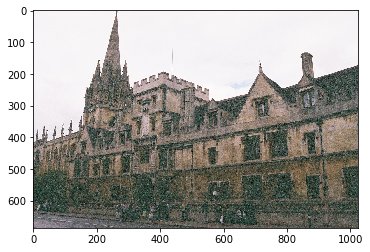

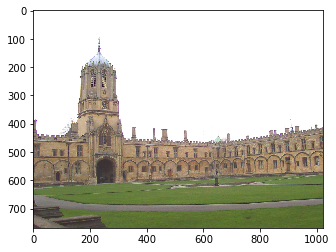

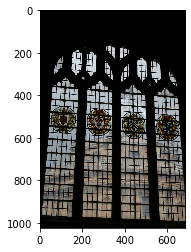

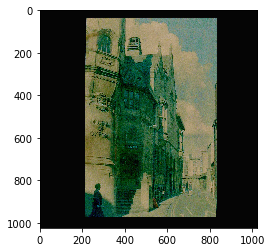

In [38]:

plt.imshow( Image.open('images/'+neworder[0][0] ))
plt.show()
plt.imshow( Image.open('images/'+neworder[1][0] ))
plt.show()
plt.imshow( Image.open('images/'+neworder[2][0] ))
plt.show()
plt.imshow( Image.open('images/'+neworder[3][0] ))
plt.show()
# plt.imshow( Image.open('images/'+neworder[4][0] ))
# plt.show()
# plt.imshow( Image.open('images/'+neworder[5][0] ))
# plt.show()
# plt.imshow( Image.open('images/'+neworder[6][0] ))
# plt.show()
# plt.imshow( Image.open('images/'+neworder[7][0] ))
# plt.show()
# plt.imshow( Image.open('images/'+neworder[8][0] ))
# plt.show()
# plt.imshow( Image.open('images/'+neworder[9][0] ))
# plt.show()

In [122]:
pwd1 = 'D:/GitHub/Semester-6/Multimedia Computing and Application/Homeworks/HW1/train/query/'
pwd2 = 'D:/GitHub/Semester-6/Multimedia Computing and Application/Homeworks/HW1/train/ground_truth/'

for filename in os.listdir(pwd1):
    print(filename[:-10])
    f = open(pwd1+filename, "r")
    fn=f.read().split(" ")[0] + str('.txt')
    fn=fn.split("_")[1:3]
    fn1=fn[0]+"_"+fn[1]+"_1_good.txt"
    fn2=fn[0]+"_"+fn[1]+"_1_junk.txt"
    fn3=fn[0]+"_"+fn[1]+"_1_ok.txt"
#     print("file 1",fn1)
#     print("file 2",fn2)
#     print("file 3",fn3)
    order=CACsorder('all_souls_000013',imagelist1)
    neworder=sorted(order,key=sec,reverse=True)
    files=[x[0][0:-4] for x in neworder[0:10]]
    files
    
    comparefiles1 = list(open(pwd2+fn1, "r"))
    comparefiles1 =[ x[0:-1] for x in  comparefiles1]
    comparefiles2 = list(open(pwd2+fn2, "r"))
    comparefiles2 =[ x[0:-1] for x in  comparefiles1]
    comparefiles3 = list(open(pwd2+fn3, "r"))
    comparefiles3 =[ x[0:-1] for x in  comparefiles3]
    
    
    finalcompare=comparefiles1+comparefiles2+comparefiles3
    print("top 10",files)
    print("images to be compared to",finalcompare)
    print(  set(files).intersection( list(finalcompare) )  )
    
    print("\n")

all_souls_1
top 10 ['oxford_001491', 'christ_church_000228', 'radcliffe_camera_000096', 'oxford_002325', 'new_000881', 'bodleian_000025', 'jesus_000291', 'christ_church_000539', 'bodleian_000396', 'new_001070']
images to be compared to ['all_souls_000091', 'all_souls_000026', 'oxford_003410', 'oxford_002985', 'all_souls_000015', 'oxford_000926', 'all_souls_000055', 'oxford_001955', 'all_souls_000140', 'all_souls_000068', 'all_souls_000002', 'all_souls_000006', 'all_souls_000209', 'all_souls_000146', 'oxford_001264', 'all_souls_000013', 'oxford_000669', 'oxford_002503', 'oxford_002338', 'oxford_000962', 'all_souls_000040', 'all_souls_000150', 'oxford_001308', 'oxford_001806', 'all_souls_00009', 'all_souls_00002', 'oxford_00341', 'oxford_00298', 'all_souls_00001', 'oxford_00092', 'all_souls_00005', 'oxford_00195', 'all_souls_00014', 'all_souls_00006', 'all_souls_00000', 'all_souls_00000', 'all_souls_00020', 'all_souls_00014', 'oxford_00126', 'all_souls_00001', 'oxford_00066', 'oxford_002

FileNotFoundError: [Errno 2] No such file or directory: 'D:/GitHub/Semester-6/Multimedia Computing and Application/Homeworks/HW1/train/ground_truth/oxford_002985.txt_1_good.txt'

# testing

In [ ]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
ascent = misc.ascent()
plt.imshow(ascent)

In [ ]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(121)  # left side
# ax2 = fig.add_subplot(122)  # right side
plt.show()

In [ ]:
result = ndimage.gaussian_laplace(ascent, sigma=1)
plt.imshow(result)

In [104]:
plt.imshow(result)
plt.show()

NameError: name 'result' is not defined

In [107]:
[i for i in [1,3,5,7]]==[1,3,5,7]

True

In [118]:
unique( np.asarray([ [1,2,3,4] ,[1,2,3,4],[1,2,3,4] ]) ) 

array([[1, 2, 3, 4]])

In [153]:
c1=cac('all_souls_000047.jpg')
c1

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

In [ ]:
start=time.time()
image = cv2.imread('images/all_souls_000047.jpg')
(h, w) = image.shape[:2]
# convert the image from the RGB color space to the L*a*b*
# color space -- since we will be clustering using k-means
# which is based on the euclidean distance, we'll use the
# L*a*b* color space where the euclidean distance implies
# perceptual meaning
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
# reshape the image into a feature vector so that k-means
# can be applied
image = image.reshape((image.shape[0] * image.shape[1], 3))
# apply k-means using the specified number of clusters and
# then create the quantized image based on the predictions
clt = MiniBatchKMeans(n_clusters = 64)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
print(time.time()-start)
# display the images and wait for a keypress
cv2.imshow("image", np.hstack([image, quant]))
cv2.waitKey(0)

In [8]:
tempo=np.random.rand(10,10)
tempo

array([[0.7262241 , 0.84886059, 0.1194683 , 0.31012303, 0.70124263,
        0.47766183, 0.20243776, 0.90425277, 0.86802909, 0.67599548],
       [0.39157329, 0.78370893, 0.83623714, 0.60568494, 0.82451089,
        0.8601517 , 0.9660065 , 0.94838536, 0.66208751, 0.49965523],
       [0.40474881, 0.18540634, 0.36513989, 0.62014219, 0.11236246,
        0.93139379, 0.04346321, 0.00259617, 0.87920034, 0.90610956],
       [0.4688449 , 0.08888768, 0.05423502, 0.86691371, 0.14539312,
        0.9127591 , 0.52989824, 0.17957215, 0.94074472, 0.73180174],
       [0.3591972 , 0.71620907, 0.14890161, 0.56841431, 0.28882871,
        0.63208791, 0.1219533 , 0.22447201, 0.11738724, 0.79270829],
       [0.90283752, 0.55865114, 0.00949176, 0.55165821, 0.12895468,
        0.97014122, 0.65703488, 0.46402726, 0.16898114, 0.00483535],
       [0.24565357, 0.57944995, 0.53234822, 0.00765481, 0.8175716 ,
        0.28077695, 0.030415  , 0.76777898, 0.0606744 , 0.6513851 ],
       [0.35070223, 0.67042327, 0.6098825

In [26]:
len( getNeighbors( tempo.shape[1],tempo.shape[0],4,4,4) )

32

In [41]:
hash(tuple([1,2,3]))

-378539185

In [45]:
np.asarray([])

array([], dtype=float64)

In [ ]:
img = np.zeros([5,5,3])

img[:,:,0] = np.ones([5,5])*64/255.0
img[:,:,1] = np.ones([5,5])*128/255.0
img[:,:,2] = np.ones([5,5])*192/255.0

cv2.imwrite('color_img.jpg', img)
cv2.imshow("image", img);
cv2.waitKey();

In [163]:
np.zeros([5,5,3])

[200,200,200]
img=np.asarray([ [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,0,0],[200,200,200],[200,200,200],[0,0,0],[0,0,0],[200,200,200],[200,200,200],[0,0,0]],
             [[0,0,0],[200,200,200],[200,200,200],[0,0,0],[0,0,0],[200,200,200],[200,200,200],[0,0,0]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]],
             [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]])
d=[1,2,3,4,5,6]
mat,freq=correlogram(img,[[0,0,0],[200,200,200]],d)
mat=np.asarray(mat)
mat


k:  1
[316, 24]
k:  2
[456, 0]
k:  3
[532, 8]
k:  4
[568, 16]
k:  5
[540, 8]
k:  6
[416, 0]


array([[316,  24],
       [456,   0],
       [532,   8],
       [568,  16],
       [540,   8],
       [416,   0]])

In [164]:
freq=[x / len(d) for x in freq]
freq

[56.0, 8.0]

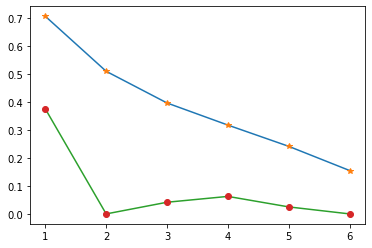

In [192]:
final=[]
x=0
for i in mat:
    final.append( [i / (j*8*d[x]) for i, j in zip(i, freq)]  )
    x+=1
np.asarray(final)

plt.plot(d,[i[0] for i in final])
plt.plot(d,[i[0] for i in final],'*')
plt.plot(d,[i[1] for i in final])
plt.plot(d,[i[1] for i in final],'o')

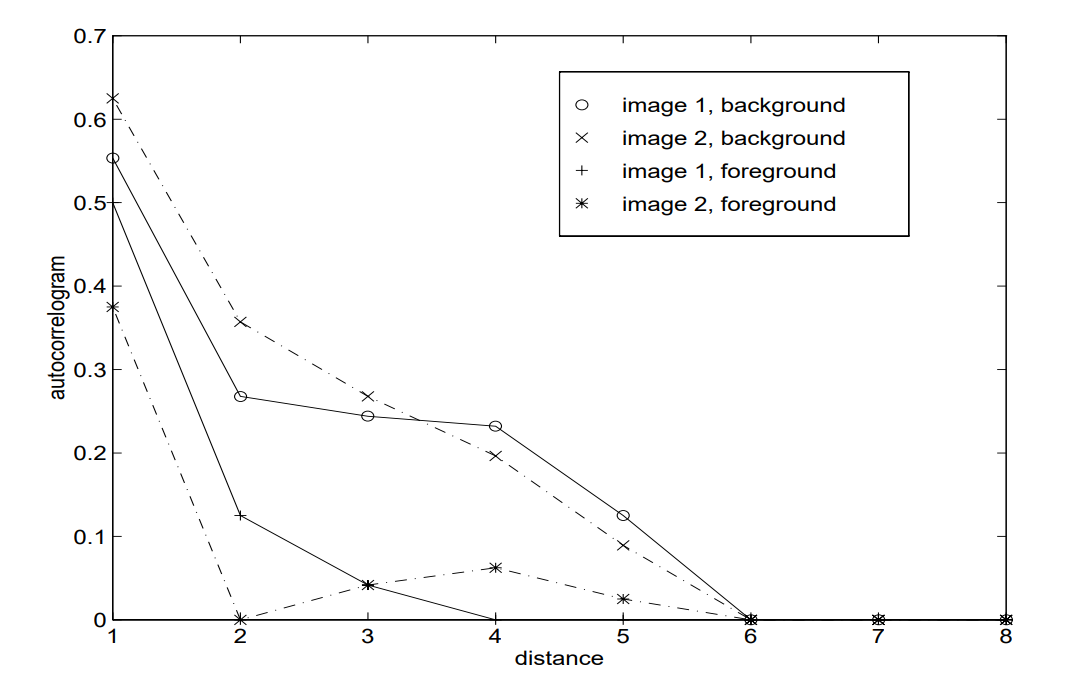

In [166]:

mat

array([[316,  24],
       [456,   0],
       [532,   8],
       [568,  16],
       [540,   8],
       [416,   0]])

In [142]:
[3,3]/[2,2]

TypeError: unsupported operand type(s) for /: 'list' and 'list'

{'3'}